In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df=pd.read_csv("/content/merge-csv.com__65603980ba1ee (1).csv")
df

,# CSV-File created with merge-csv.com
0,# --------------------------------------------...
1,Date.Time\tMonth\tDay.Fraction\tIndv.ID\tAltitude
2,2006-10-03 07:00:00\t10\t1\t65955\t196
3,2006-10-05 07:00:00\t10\t1\t65955\t265
4,2006-10-06 07:00:00\t10\t1\t65955\t52
...,...
1651901,2015-04-03 18:00:31\t4\t15\tZlipi\t0
1651902,2015-04-04 18:00:15\t4\t15\tZlipi\t0
1651903,2015-04-05 18:00:26\t4\t15\tZlipi\t0
1651904,2015-04-06 18:00:56\t4\t15\tZlipi\t0


In [ ]:
df = df['# CSV-File created with merge-csv.com'].str.split('\t', expand=True)
df.columns = ['Date.Time', 'Month', 'Day.Fraction', 'Indv.ID', 'Altitude']

In [ ]:
df

,Date.Time,Month,Day.Fraction,Indv.ID,Altitude
0,# --------------------------------------------...,None,None,None,None
1,Date.Time,Month,Day.Fraction,Indv.ID,Altitude
2,2006-10-03 07:00:00,10,1,65955,196
3,2006-10-05 07:00:00,10,1,65955,265
4,2006-10-06 07:00:00,10,1,65955,52
...,...,...,...,...,...
1651901,2015-04-03 18:00:31,4,15,Zlipi,0
1651902,2015-04-04 18:00:15,4,15,Zlipi,0
1651903,2015-04-05 18:00:26,4,15,Zlipi,0
1651904,2015-04-06 18:00:56,4,15,Zlipi,0


In [ ]:
df.drop(index=[0,1], axis = 0, inplace = True)

In [ ]:
df.info();
df.columns;
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651904 entries, 2 to 1651905
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Date.Time     1651904 non-null  object
 1   Month         1651904 non-null  object
 2   Day.Fraction  1651904 non-null  object
 3   Indv.ID       1651904 non-null  object
 4   Altitude      1651904 non-null  object
dtypes: object(5)
memory usage: 63.0+ MB


,Date.Time,Month,Day.Fraction,Indv.ID,Altitude
count,1651904,1651904,1651904,1651904,1651904
unique,998817,12,15,211,18841
top,2016-02-17 11:00:07,7,9,47609767,0
freq,27,183569,125133,31021,868284


In [ ]:
df.duplicated().sum()

22

In [ ]:
df.dtypes

Date.Time       object
Month           object
Day.Fraction    object
Indv.ID         object
Altitude        object
dtype: object

In [ ]:
df["Indv.ID"].unique()

array(['65955', '65956', '65957', '65958', '67252', '67253', '67254',
       '67255', '67256', '67257', '67258', 'Carrascalinho', 'Coa',
       'Murtigao', 'Orca', '130087972', '130088008', '130088753',
       '130089260', '130089678', '130090821', '130090831', '130090842',
       '130291527', '135368877', '135369082', '135369201', '135369277',
       '135369403', '135369664', '135369771', '135370038', '135370119',
       '135370437', '135370640', '135811990', '135815087', '135815097',
       '135815139', '135815167', '160781143', '254508470', '46346642',
       '46346678', '47609676', '47609689', '47609704', '47609719',
       '47609726', '47609738', '47609745', '47609756', '47609767',
       '47609779', '47609790', '47609801', '47609812', '47609824',
       '47781481', '47871448', '47871481', '47871487', '47871511',
       '47871525', '47871554', '47871564', '47871582', '47871609',
       '47871647', '47980732', '47980749', '48070846', 'ADAN', 'ALCUDIA',
       'APOLO', 'ARTESA', 'CH

In [ ]:
df["Altitude"].unique()

array(['196', '265', '52', ..., '-56.5', '1902.5', '-153.9'], dtype=object)

In [ ]:
# Assuming df is your DataFrame and 'Altitude' is the column you want to convert
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce', downcast='integer')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
IndvID = label_encoder.fit_transform(df['Indv.ID'])
Date_Time = label_encoder.fit_transform(df['Date.Time'])
IndvID

array([ 58,  58,  58, ..., 210, 210, 210])

In [ ]:
df["IndvID"] = IndvID
df["Date_Time"] = Date_Time

In [ ]:
df1 = df.drop(columns = ["Indv.ID", "Date.Time"])

In [ ]:
df1

,Month,Day.Fraction,Altitude,IndvID,Date_Time
2,10,1,196.0,58,347
3,10,1,265.0,58,355
4,10,1,52.0,58,359
5,10,1,276.0,58,379
6,12,1,290.0,58,688
...,...,...,...,...,...
1651901,4,15,0.0,210,104764
1651902,4,15,0.0,210,105271
1651903,4,15,0.0,210,105729
1651904,4,15,0.0,210,106209


In [ ]:
feature_cols=['Month','IndvID']
X=df1[feature_cols]
y=df1.Altitude
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming you have a dataset (X, y) where X is your feature matrix and y is your continuous target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Discretize the continuous target variable into bins
k_bins_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_train_discrete = k_bins_discretizer.fit_transform(y_train.values.reshape(-1, 1))
y_test_discrete = k_bins_discretizer.transform(y_test.values.reshape(-1, 1))

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train_discrete)

# Make predictions on the testing data
y_pred_discrete = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)
print(f"Accuracy: {accuracy:.2f}")

# You can also print other metrics like classification report
print("Classification Report:\n", classification_report(y_test_discrete, y_pred_discrete))


<ipython-input-17-1f0205838af5>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train_discrete)


Accuracy: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       106
         1.0       0.99      1.00      0.99    326916
         2.0       0.00      0.00      0.00      3359

    accuracy                           0.99    330381
   macro avg       0.33      0.33      0.33    330381
weighted avg       0.98      0.99      0.98    330381



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have a dataset (X, y) where X is your feature matrix and y is your continuous target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the regressor on the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_regressor.predict(X_test)

# Evaluate the performance of the regressor
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

accuracy = accuracy_score(y_test_discrete, y_pred_discrete)
print(f"Accuracy: {accuracy:.2f}")


Mean Squared Error: 45226.72
Accuracy: 0.99


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming you have a dataset (X, y) where X is your feature matrix and y is your continuous target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Regressor
svr_regressor = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the regressor on the training data
svr_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr_regressor.predict(X_test)

# Evaluate the performance of the regressor
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

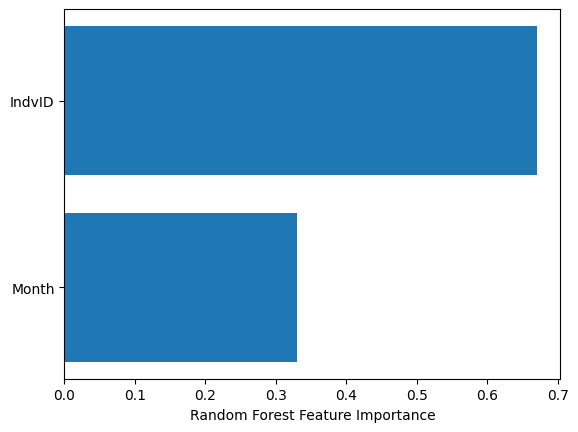

In [ ]:
# Assuming clf is your trained Random Forest classifier
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
feature_names = feature_cols # Replace with your actual feature names

# Sort features by importance
sorted_idx = feature_importances.argsort()

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx])
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assume df is a DataFrame with a time column and a target variable
# Adjust this based on your actual dataset


# Feature engineering (add more features as needed)
df['day_of_week'] = df['Date.Time'].dt.dayofweek
df['month'] = df['Date.Time'].dt.month
df['day_of_year'] = df['Date.Time'].dt.dayofyear

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Define features and target variable
features = ['day_of_week', 'month', 'day_of_year']
target = df['Altitude']

X_train, y_train = train[feature_cols], train[target]
X_test, y_test = test[features_cols], test[target]

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(test['date'], y_test, label='Actual', marker='o')
plt.plot(test['date'], y_pred, label='Predicted', marker='o')
plt.title('XGBoost Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


AttributeError: ignored

In [ ]:
df

,Date.Time,Month,Day.Fraction,Indv.ID,Altitude,IndvID,Date_Time
2,2006-10-03 07:00:00,10,1,65955,196.0,58,347
3,2006-10-05 07:00:00,10,1,65955,265.0,58,355
4,2006-10-06 07:00:00,10,1,65955,52.0,58,359
5,2006-10-11 07:00:00,10,1,65955,276.0,58,379
6,2006-12-27 08:00:00,12,1,65955,290.0,58,688
...,...,...,...,...,...,...,...
1651901,2015-04-03 18:00:31,4,15,Zlipi,0.0,210,104764
1651902,2015-04-04 18:00:15,4,15,Zlipi,0.0,210,105271
1651903,2015-04-05 18:00:26,4,15,Zlipi,0.0,210,105729
1651904,2015-04-06 18:00:56,4,15,Zlipi,0.0,210,106209
